In [1]:
import numpy as np
age_list = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
healthy_price_plan = np.array([[871], [1132], [1042], [1356], [1448], [1638], [1569], [1754], [1866], [1900]])

In [2]:
age_list

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
healthy_price_plan

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1448],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_age_list = StandardScaler()
age_list = scaler_age_list.fit_transform(age_list)

In [5]:
age_list

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
scaler_healthy_price_plan = StandardScaler()
healthy_price_plan = scaler_healthy_price_plan.fit_transform(healthy_price_plan)

In [7]:
healthy_price_plan

array([[-1.7461362 ],
       [-0.96921573],
       [-1.23711934],
       [-0.30243341],
       [-0.02857639],
       [ 0.5369979 ],
       [ 0.33160514],
       [ 0.88229589],
       [ 1.21568705],
       [ 1.31689508]])

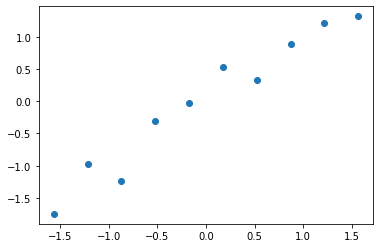

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(age_list, healthy_price_plan)

# Fórmula da regressão linear simples

y = b0 + b1 * x

In [9]:
np.random.seed(0)
initial_array = np.random.rand(2)

In [10]:
import tensorflow as tf

In [11]:
b0 = tf.Variable(initial_array[0])
b1 = tf.Variable(initial_array[1])

In [12]:
def linear_regression(x):
  return b0 + b1 * x

In [13]:
linear_regression(40)

<tf.Tensor: shape=(), dtype=float64, numpy=29.156388158824104>

In [14]:
optimizer = tf.optimizers.SGD(learning_rate = 0.001)

In [15]:
for i in range(10000):
  with tf.GradientTape() as gradient_tape:
    prediction = linear_regression(age_list)
    loss = tf.losses.mean_squared_error(healthy_price_plan, prediction)
  gradients = gradient_tape.gradient(loss, [b1, b0])
  optimizer.apply_gradients(zip(gradients, [b1, b0]))

In [16]:
b0

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.9141936769106687e-16>

In [17]:
b1

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.9735530880277216>

In [18]:
results = linear_regression(age_list)
print(results)
type(results)
results = results.numpy()

tf.Tensor(
[[-1.52526456]
 [-1.18631688]
 [-0.8473692 ]
 [-0.50842152]
 [-0.16947384]
 [ 0.16947384]
 [ 0.50842152]
 [ 0.8473692 ]
 [ 1.18631688]
 [ 1.52526456]], shape=(10, 1), dtype=float64)


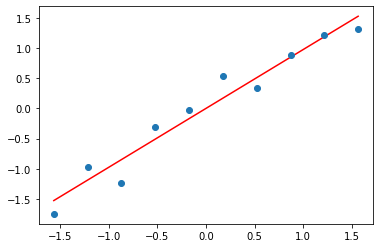

In [19]:
plt.plot(age_list, results, color = 'red')
plt.plot(age_list, healthy_price_plan, 'o')

In [20]:
age = scaler_age_list.transform([[40]])

In [21]:
prevision = linear_regression(age)
print(scaler_healthy_price_plan.inverse_transform(prevision))

[[1446.21333333]]


In [22]:
healthy_price_plan_original = scaler_healthy_price_plan.inverse_transform(healthy_price_plan)
healthy_price_plan_original

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1448.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [23]:
healthy_price_plan_predicted = scaler_healthy_price_plan.inverse_transform(results)
healthy_price_plan_predicted

array([[ 945.2       ],
       [1059.06666667],
       [1172.93333333],
       [1286.8       ],
       [1400.66666667],
       [1514.53333333],
       [1628.4       ],
       [1742.26666667],
       [1856.13333333],
       [1970.        ]])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(healthy_price_plan_original, healthy_price_plan_predicted)
mse = mean_squared_error(healthy_price_plan_original, healthy_price_plan_predicted)

In [25]:
print(mae)
print(mse)

66.90666666666675
5890.493333333337
